# WiDS Datathon 2025: Brain Imaging Analysis
## Data Exploration Notebook

This notebook explores the brain imaging data for predicting ADHD diagnosis and biological sex.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from nilearn import plotting

%matplotlib inline


In [3]:
# Load the connectome data
# We'll only read a small portion first since the file is large
connectome_data = pd.read_csv('TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv', nrows=5)

# Look at the basic information about the dataset
print("Dataset Shape:", connectome_data.shape)
print("\nFirst few columns:")
print(connectome_data.columns[:5])  # Just show first 5 columns to avoid overwhelming output

Dataset Shape: (5, 19901)

First few columns:
Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn'],
      dtype='object')


In [5]:
# Look at the first few columns and the last few columns
print("First 5 columns:")
print(connectome_data.columns[:5])
print("\nLast 5 columns:")
print(connectome_data.columns[-5:])

First 5 columns:
Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn'],
      dtype='object')

Last 5 columns:
Index(['196throw_198thcolumn', '196throw_199thcolumn', '197throw_198thcolumn',
       '197throw_199thcolumn', '198throw_199thcolumn'],
      dtype='object')


In [6]:
# First, let's look at the basic information about our dataset
print("1. Basic Dataset Information:")
print("-" * 50)
print(f"Total number of columns: {len(connectome_data.columns)}")
print(f"Number of rows (subjects): {len(connectome_data)}")

print("\n2. First Few Column Names:")
print("-" * 50)
print(connectome_data.columns[:5].tolist())

print("\n3. Last Few Column Names:")
print("-" * 50)
print(connectome_data.columns[-5:].tolist())

print("\n4. First Row Preview:")
print("-" * 50)
# Show first 5 values from the first row
print(connectome_data.iloc[0, :5])

1. Basic Dataset Information:
--------------------------------------------------
Total number of columns: 19901
Number of rows (subjects): 5

2. First Few Column Names:
--------------------------------------------------
['participant_id', '0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn']

3. Last Few Column Names:
--------------------------------------------------
['196throw_198thcolumn', '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn', '198throw_199thcolumn']

4. First Row Preview:
--------------------------------------------------
participant_id      70z8Q2xdTXM3
0throw_1thcolumn        0.093473
0throw_2thcolumn        0.146902
0throw_3thcolumn        0.067893
0throw_4thcolumn        0.015141
Name: 0, dtype: object


Shape of brain_matrix: (200, 200)

Value range: -0.2093945868483774 to 1.0


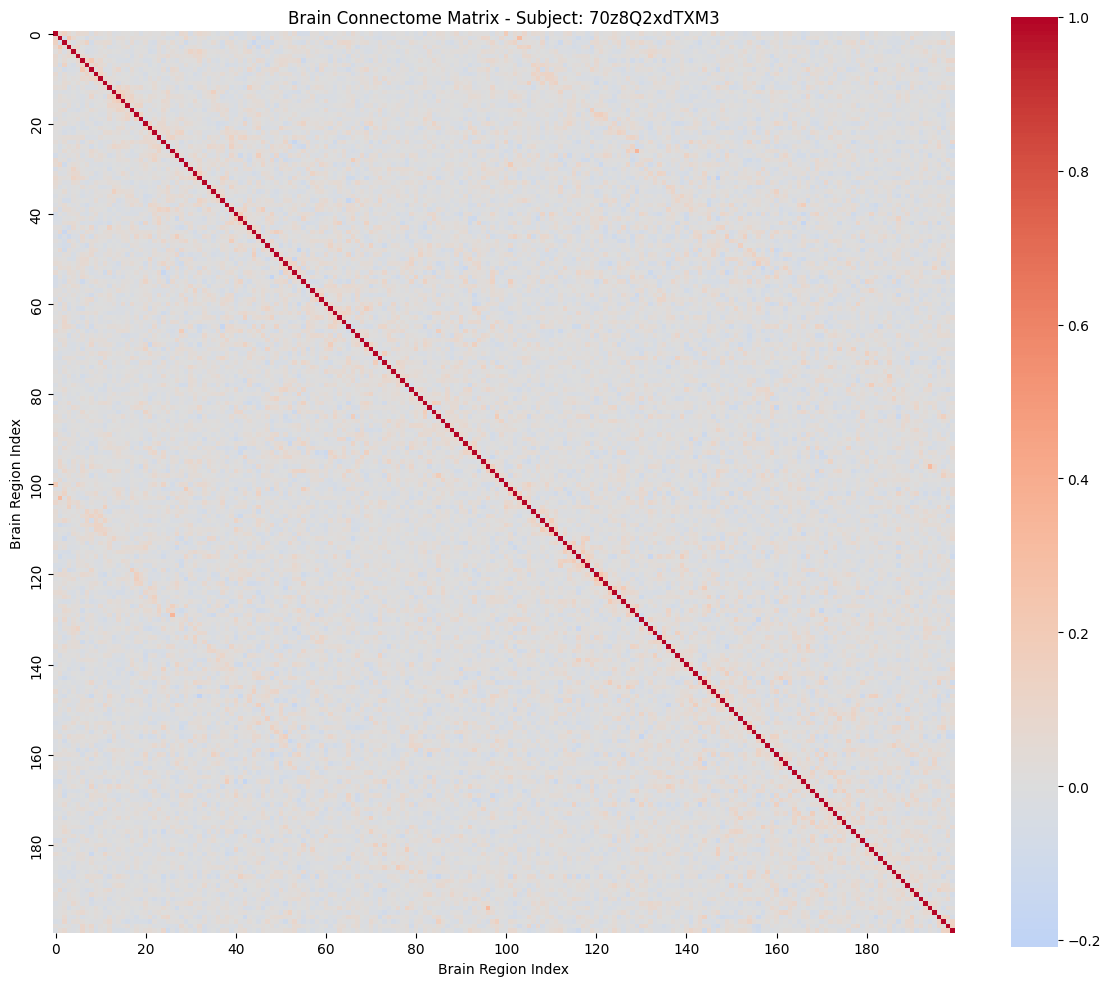

In [9]:
# First, let's see what our data looks like
print("Shape of brain_matrix:", brain_matrix.shape)
print("\nValue range:", np.min(brain_matrix), "to", np.max(brain_matrix))

# Now create the visualization
fig, ax = plt.subplots(figsize=(12, 10))  # Create figure and axis objects

# Create the heatmap and store the returned mappable object
heatmap = sns.heatmap(brain_matrix, 
                      cmap='coolwarm',      
                      center=0,             
                      square=True,          
                      xticklabels=20,       
                      yticklabels=20,
                      ax=ax)                # Specify which axis to plot on

plt.title(f'Brain Connectome Matrix - Subject: {first_subject["participant_id"]}')
plt.xlabel('Brain Region Index')
plt.ylabel('Brain Region Index')

# The colorbar will be automatically added by seaborn
plt.tight_layout()  # Adjust the layout to prevent overlap

# Display the plot
plt.show()

In [ ]:
pip install ipykernel
python -m ipykernel install

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [14]:
pip install openpyxl

     |████████████████████████████████| 250 kB 755 kB/s eta 0:00:01
You should consider upgrading via the '/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
# categorical variable train dataframe
import pandas as pd

file_path_trainC = '/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/train/train_categorical_metadata.xlsx'
train_cat = pd.read_excel(file_path_trainC)
train_cat.head()


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [16]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [17]:
# Functional Connectome Matrices

file_path_trainFCM = "/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/train/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [18]:
train_FCM.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [19]:
# Quantitative varaible train dataframe

file_path_trainQ = "/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/train/TRAIN_QUANTITATIVE_METADATA.xlsx"
train_Quant = pd.read_excel(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [20]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [21]:
# ADHD and Sex solutions dataframe for model training

file_path_trainS = "/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/train/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)
train_Solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [23]:
train_Solutions.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [24]:
train_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [25]:
#Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

# 0=Homemaker, stay at home parent.
# 5=Day laborer, janitor, house cleaner, farm worker, food counter sales, food preparation worker, busboy.
# 10=Garbage collector, short-order cook, cab driver, shoe sales, assembly line workers, masons, baggage porter.
# 15=Painter, skilled construction trade, sales clerk, truck driver, cook, sales counter or general office clerk.
# 20=Automobile mechanic, typist, locksmith, farmer, carpenter, receptionist, construction laborer, hairdresser.
# 25=Machinist, musician, bookkeeper, secretary, insurance sales, cabinet maker, personnel specialist, welder.
# 30=Supervisor, librarian, aircraft mechanic, artist and artisan, electrician, administrator, military enlisted personnel, buyer.
# 35=Nurse, skilled technician, medical technician, counselor, manager, police and fire personnel, financial manager, physical, occupational, speech therapist.
# 40=Mechanical, nuclear, and electrical engineer, educational administrator, veterinarian, military officer, elementary, high school and special education teacher.


Barratt_Barratt_P2_Occ
0     287
45    239
35    195
30    149
40    116
15     86
20     41
5      38
10     37
25     25
Name: count, dtype: int64

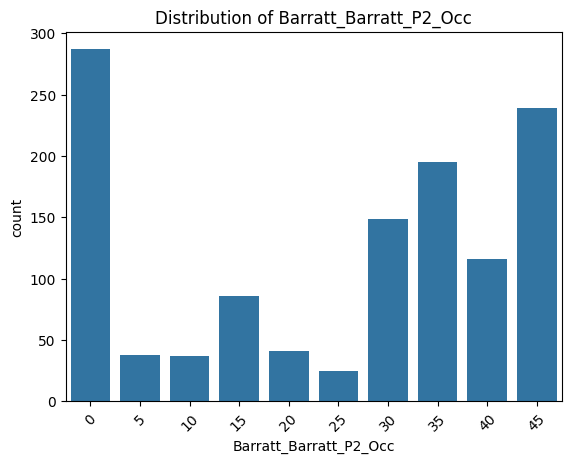

In [26]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

In [27]:
#Barratt_Barratt_P1_Edu - Barratt Simplified Measure of Social Status - Parent 1 level of education
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

# 3=Less than 7th grade
# 6=Junior high/Middle school (9th grade)
# 9=Partial high school (10th or 11th grade)
# 12=High school graduate
# 15=Partial college (at least one year)
# 18=College education
# 21=Graduate degree

Barratt_Barratt_P1_Edu
21    470
18    421
15    162
12     97
9      28
0      15
6      15
3       5
Name: count, dtype: int64

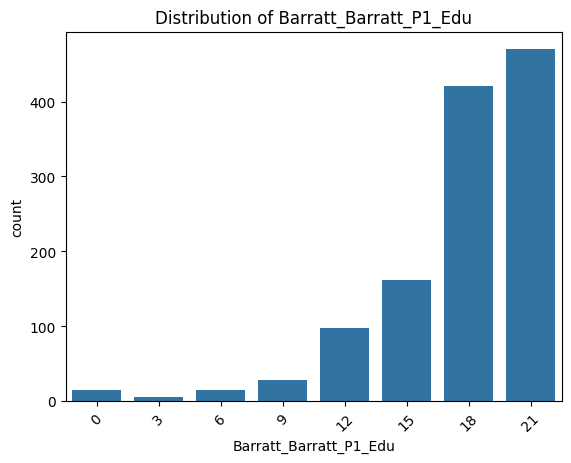

In [28]:
sns.countplot(x='Barratt_Barratt_P1_Edu', data=train_cat[['Barratt_Barratt_P1_Edu']])
plt.title(f"Distribution of Barratt_Barratt_P1_Edu")
plt.xticks(rotation=45)
plt.show()

In [29]:
#Barratt_Barratt_P1_Occ - Barratt Simplified Measure of Social Status - Parent 1 occupation
train_cat['Barratt_Barratt_P1_Occ'].value_counts()

Barratt_Barratt_P1_Occ
0     317
35    219
45    187
40    154
30    154
25     79
15     35
20     31
5      31
10      6
Name: count, dtype: int64

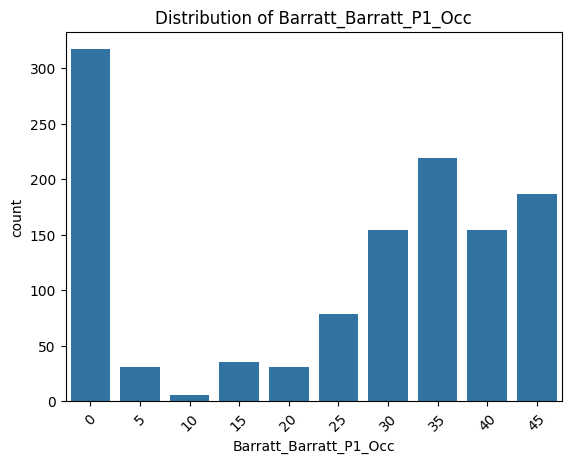

In [30]:
sns.countplot(x='Barratt_Barratt_P1_Occ', data=train_cat[['Barratt_Barratt_P1_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P1_Occ")
plt.xticks(rotation=45)
plt.show()